<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here
print(df.info())
print(df.isna().sum()) 
categorical_cols = df.select_dtypes(include =['object']).columns 
for col in categorical_cols:
    print(df[col].value_counts(dropna =False).head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                  

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here

print("\nNumerical Columns Statistics:")
print(df.describe(include=['int64', 'float64']))


Numerical Columns Statistics:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [7]:
# Write your code here
print(df['Country'].unique()) 
inconsistent_countries =df[~df['Country'].str.contains('[a-zA-Z]', na =False)] 
print(inconsistent_countries['Country'].unique())



['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [10]:
## Write your code here
df['Country'] = df['Country'].str.strip().str.title() 

education_mapping = {
    'Bachelor\'s degree': 'Bachelor\'s',
    'Master\'s degree': 'Master\'s',
    'Ph.D.': 'Doctorate', 
    'Some_college': 'Some College'
} 

df['EdLevel'] = df['EdLevel'].replace(education_mapping) 
print(df['EdLevel'].value_counts())

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [12]:
## Write your code here
Employment_dummies = pd.get_dummies(df['Employment'], prefix ='Employment') 
df =pd.concat([df, Employment_dummies], axis = 1) 
print(Employment_dummies.head())

   Employment_Employed, full-time  \
0                            True   
1                            True   
2                            True   
3                           False   
4                           False   

   Employment_Employed, full-time;Employed, part-time  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

   Employment_Employed, full-time;Independent contractor, freelancer, or self-employed  \
0                                              False                                     
1                                              False                                     
2                                              False                                     
3                                              False                      

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [14]:
## Write your code here

missing_counts = df.isna().sum()
column_with_most_missing = missing_counts.idxmax()
max_missing_count = missing_counts.max()

print(f"Column with the most missing values: '{column_with_most_missing}' ({max_missing_count} missing)")

Column with the most missing values: 'AINextMuch less integrated' (64289 missing)


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [15]:
## Write your code here
# Impute ConvertedCompYearly with median

comp_median = df['ConvertedCompYearly'].median() 
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(comp_median) 
print(df['ConvertedCompYearly'].describe())

count    6.543700e+04
mean     7.257636e+04
std      1.122207e+05
min      1.000000e+00
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [17]:
## Write your code here
# Impute RemoteWork with mode


remote_mode = df['RemoteWork'].mode()[0] 
df['RemoteWork'] =df['RemoteWork'].fillna(remote_mode) 
print(df['RemoteWork'].value_counts(dropna =False))

RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [18]:
## Write your code here
# Apply Min-Max Scaling to ConvertedCompYearly


min_comp = df['ConvertedCompYearly'].min() 
max_comp =df['ConvertedCompYearly'].max() 
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_comp) / (max_comp - min_comp) 
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

   ConvertedCompYearly  ConvertedCompYearly_MinMax
0              65000.0                    0.003998
1              65000.0                    0.003998
2              65000.0                    0.003998
3              65000.0                    0.003998
4              65000.0                    0.003998


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


Found existing installation: matplotlib 3.10.3
Uninstalling matplotlib-3.10.3:
  Successfully uninstalled matplotlib-3.10.3
  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
   ConvertedCompYearly  ConvertedCompYearly_Log
0              65000.0                11.082158
1              65000.0                11.082158
2              65000.0                11.082158
3              65000.0                11.082158
4              65000.0                11.082158


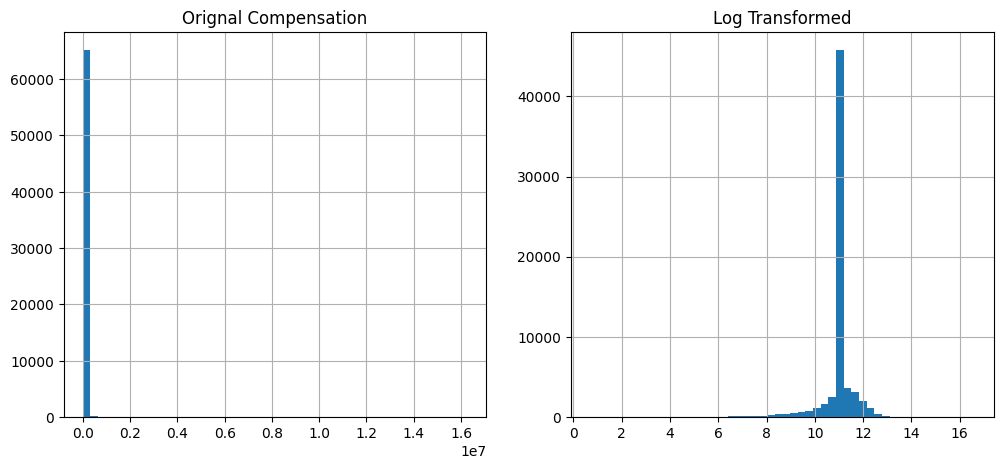

In [27]:
## Write your code here
# Apply log transformation (adding 1 to handle zeros)

import numpy as np 
# Uninstall and reinstall matplotlib (in case of corruption)
!pip uninstall matplotlib -y
!pip install matplotlib --upgrade

# Import with the correct convention
import matplotlib.pyplot as plt
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly']) 
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Log']].head())
plt.figure(figsize =(12,5)) 
plt.subplot(1,2,1)
df['ConvertedCompYearly'].hist(bins =50)
plt.title('Orignal Compensation')
plt.subplot(1,2,2) 
df['ConvertedCompYearly_Log'].hist(bins =50)
plt.title('Log Transformed')
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [31]:
    ## Write your code here
    # Create experience categories
    
    # Convert to numeric, coerce errors to NaN
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
    
    # Now create experience categories
    bins = [0, 3, 7, 15, float('inf')]
    labels = ['Junior', 'Mid-Level', 'Senior', 'Expert']
    df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)
    
    print("\nExperience Level Distribution:")
    print(df['ExperienceLevel'].value_counts(dropna=False))
    
    # Fill NA with 'Unknown' (if conversion introduced NaNs)
    df['ExperienceLevel'] = df['ExperienceLevel'].cat.add_categories('Unknown').fillna('Unknown')



Experience Level Distribution:
ExperienceLevel
NaN          16733
Senior       14226
Mid-Level    12101
Expert       11477
Junior       10900
Name: count, dtype: int64


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
